# Rossler Attractor - Test

Import files and packages

In [1]:
# Packages
import numpy as np

# Rossler System
from dynamicSystems.rosslerAttractor import rossler_generate
from general.trajectory import trajectory

# Plotting
from general.Plotting.graphicalPlotting import generate3Dplot
from general.Plotting.graphicalPlotting import generate2Dplot

# Optimal Tau
from general.mutualInformation.mutualInformationWTS import mutualInformationWTS
from general.optimalTau import generateOptimalTau

# Embedding Dimension
from general.optimalEmbeddingDimension import grassberg_procaccia

# Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

Set conditions:
1.) Rossler parameters.
2.) Intial starting point for system.
3.) Time Parameters

In [2]:
# Rossler parameters: Paper
a = 0.2
b = 0.2
c = 5.7

# Initial condition (random, just interesting starting points)
initial_condition = np.array([0, 0, 0])

# Set Time Parameters
# Paper Parameters
dt = 0.05
num_points = 4096

In [3]:
initial_condition = np.array([0, 0, 0])

Generate and Plot Rossler Attractor

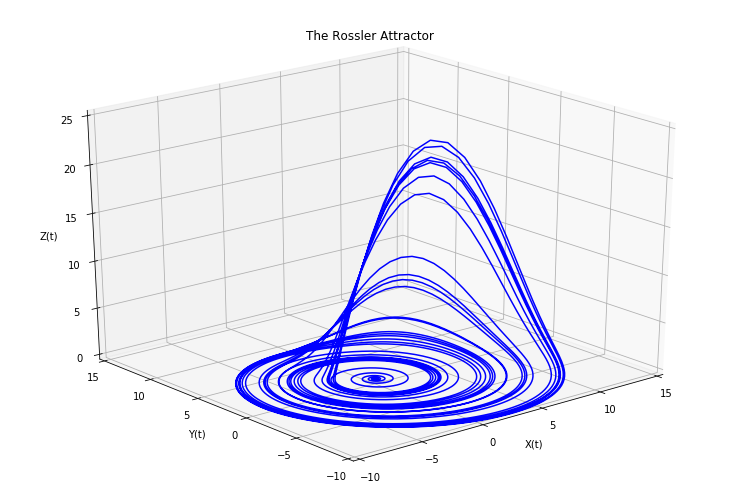

In [4]:
# Generate Rossler Attractor
rossler_data = rossler_generate(num_points=num_points, initial_state=initial_condition, parameters=np.array([a, b, c]),
                                dt=dt)

# Plot Rossler Attractor
generate3Dplot(rossler_data,
               title='The Rossler Attractor',
               axis_labels=('X(t)', 'Y(t)', 'Z(t)'),
               axis_lim=([-10, 15], [-10, 15], [0, 25]))

Rossler Attractor Reproduced with varying tua.

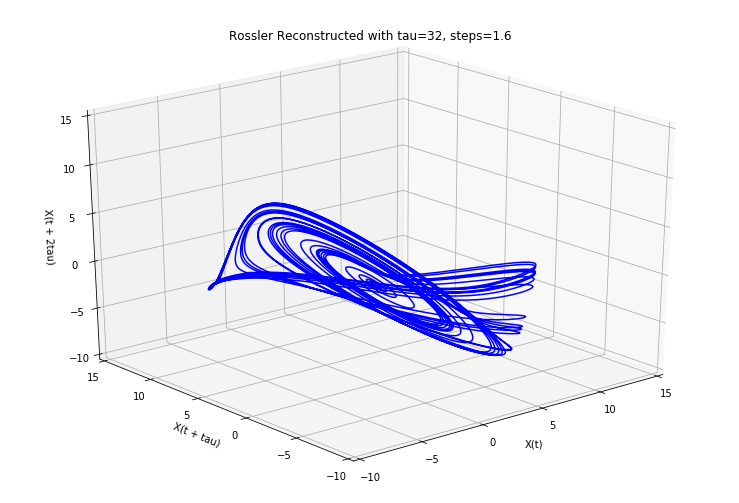

In [5]:
# Trajectory: Paper Replications
# Tau: 32
# Compute Trajectory
signalData = rossler_data[:, 0]  # First factor (X component) of Rossler Attractor
maxEmDim = 3
timeDelay = 32
portrait = trajectory(signalData, maxEmDim, timeDelay)
# Plot
generate3Dplot(data=portrait,
               title='Rossler Reconstructed with tau=32, steps=1.6',
               axis_labels=('X(t)', 'X(t + tau)', 'X(t + 2tau)'),
               axis_lim=([-10, 15], [-10, 15], [-10, 15])
               )

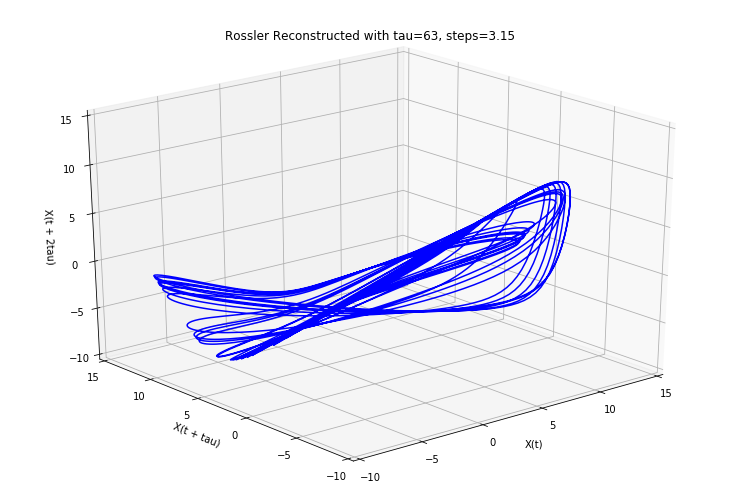

In [6]:
# Tau: 63
# Compute Trajectory
signalData = rossler_data[:, 0]  # First factor (X component) of Rossler Attractor
maxEmDim = 3
timeDelay = 63
portrait = trajectory(signalData, maxEmDim, timeDelay)
# Plot
generate3Dplot(data=portrait,
               title='Rossler Reconstructed with tau=63, steps=3.15',
               axis_labels=('X(t)', 'X(t + tau)', 'X(t + 2tau)'),
               axis_lim=([-10, 15], [-10, 15], [-10, 15])
               )

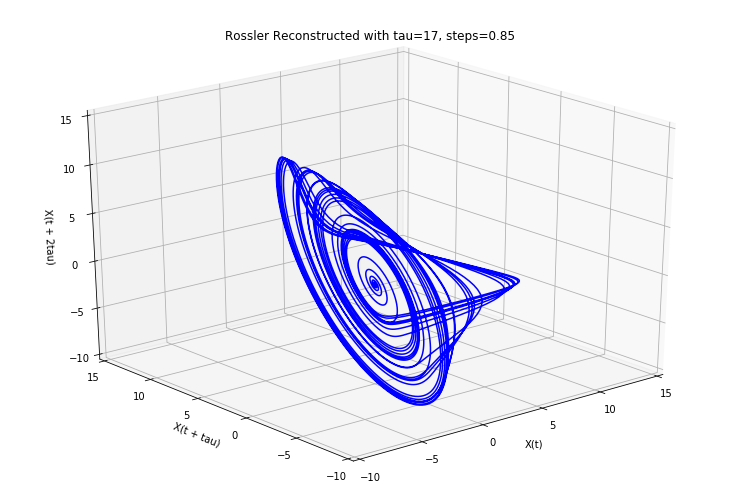

In [7]:
# Tau: 17
# Compute Trajectory
signalData = rossler_data[:, 0]  # First factor (X component) of Rossler Attractor
maxEmDim = 3
timeDelay = 17
portrait = trajectory(signalData, maxEmDim, timeDelay)
# Plot
generate3Dplot(data=portrait,
               title='Rossler Reconstructed with tau=17, steps=0.85',
               axis_labels=('X(t)', 'X(t + tau)', 'X(t + 2tau)'),
               axis_lim=([-10, 15], [-10, 15], [-10, 15])
               )

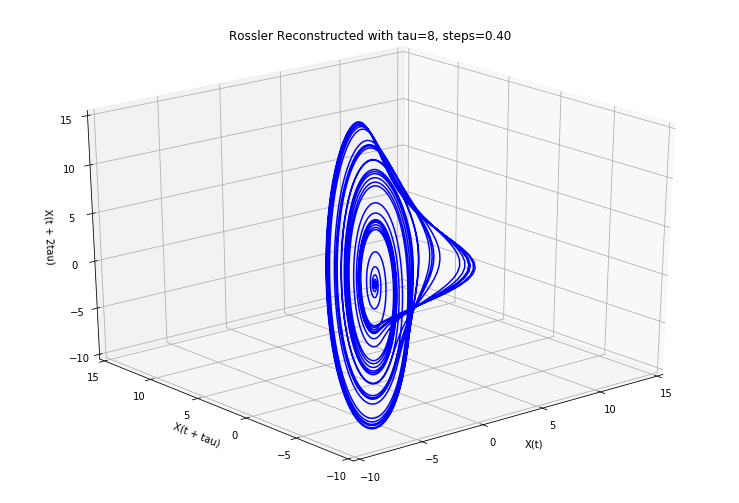

In [8]:
# Tau: 8
# Compute Trajectory
signalData = rossler_data[:, 0]  # First factor (X component) of Rossler Attractor
maxEmDim = 3
timeDelay = 8
portrait = trajectory(signalData, maxEmDim, timeDelay)
# Plot
generate3Dplot(data=portrait,
               title='Rossler Reconstructed with tau=8, steps=0.40',
               axis_labels=('X(t)', 'X(t + tau)', 'X(t + 2tau)'),
               axis_lim=([-10, 15], [-10, 15], [-10, 15])
               )

# Recontruction Attempt

Let signal data be the x-component of rossler attractor.

In [9]:
# Calculate Optimal Choice of Time Shift Tau
# Create Signal Data
signalData = rossler_data[:, 0]  # First factor (X component) of Rossler Attractor

### Calculate Optimal Choice of Time Shift Tau

Autocorrelaiton

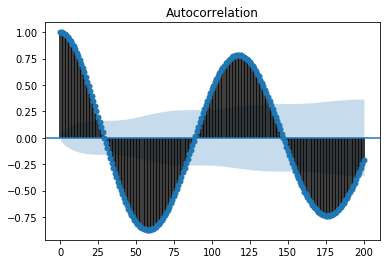

In [10]:
# Autocorrelation
plot_acf(signalData, lags= 200, alpha=0.05)
signalData_ACF = acf(signalData, fft=False)

Analyze Mutual Information.

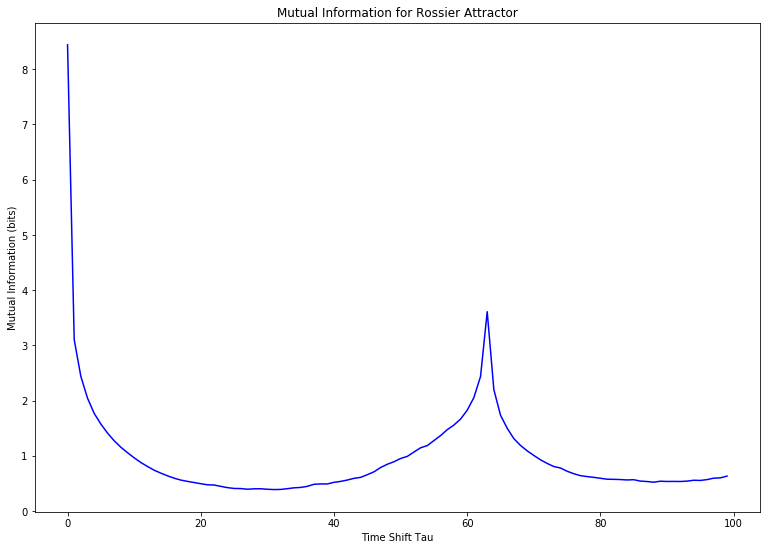

In [11]:
# Set Max Time Delay when calculating Mutual Information
maxTimeDelay = 100

# Calculate Mutual Information for every time delay
mutualInformation = mutualInformationWTS(signalData, maxTimeDelay)

# Plot Mutual Information
generate2Dplot(data=mutualInformation,
               title='Mutual Information for Rossier Attractor',
               axis_labels=('Time Shift Tau', 'Mutual Information (bits)'),
               axis_lim_inc=False
               )

In [12]:
# Get Optimal Choice of Time Shift Tau
optimalTau = generateOptimalTau(signalData, dimension=3, method="Minimizing MI over first (d-1) Tau")
print('Optimal Tau Choice: ' + str(optimalTau))

Optimal Tau Choice: 12


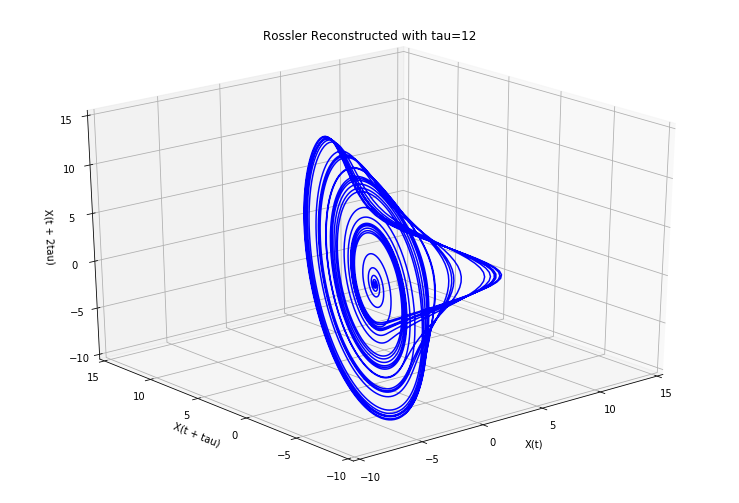

In [13]:
# Compute Trajectory
maxEmDim = 3
timeDelay = optimalTau
portrait = trajectory(signalData, maxEmDim, timeDelay)

# Plot
generate3Dplot(data=portrait,
               title='Rossler Reconstructed with tau=' + str(timeDelay),
               axis_labels=('X(t)', 'X(t + tau)', 'X(t + 2tau)'),
               axis_lim=([-10, 15], [-10, 15], [-10, 15])
               )


Calculate Correlation Dimension. NOTE: Algorithm takes ~1min to run

4048


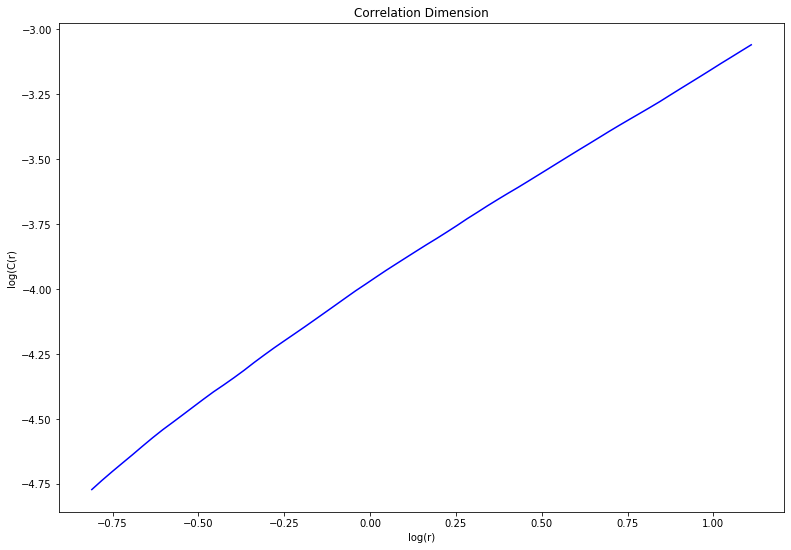

Estimated Fractal Dimension of Recreated Attractor: 1.1394931799532304


In [14]:
corr_dim_portrait = grassberg_procaccia(portrait, 3, timeDelay, plot=True)
print('Estimated Fractal Dimension of Recreated Attractor: ' + str(corr_dim_portrait))

4072


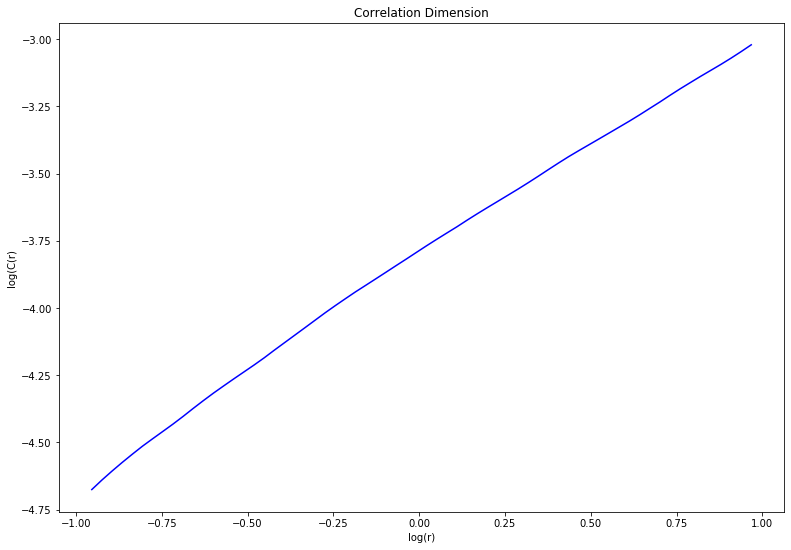

Estimated Fractal Dimension of Rossler Attractor: 1.1121196559651574


In [15]:
corr_dim_rossler = grassberg_procaccia(rossler_data, 3, timeDelay, plot=True)
print('Estimated Fractal Dimension of Rossler Attractor: ' + str(corr_dim_rossler))